In [1]:
import torch

print("CUDA available:", torch.cuda.is_available())
print("GPU count:", torch.cuda.device_count())
print("Current device:", torch.cuda.current_device())
print("GPU name:", torch.cuda.get_device_name(torch.cuda.current_device()) if torch.cuda.is_available() else "No GPU found")

CUDA available: True
GPU count: 1
Current device: 0
GPU name: NVIDIA GeForce RTX 3050 Laptop GPU


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../Cleaned data/final_email_dataset.csv")

In [3]:
df.head()

,clean_text,category,auto_category,auto_urgency
0,Traveling to have a business meeting takes the...,unknown,other,low
1,test successful. way to go!!!,unknown,other,low
2,"Randy,\n Can you send me a schedule of the sal...",unknown,request,medium
3,Let's shoot for Tuesday at 11:45.,unknown,other,low
4,"Greg,\n How about either next Tuesday or Thurs...",unknown,other,low


Category Distribution for unclipped dataset

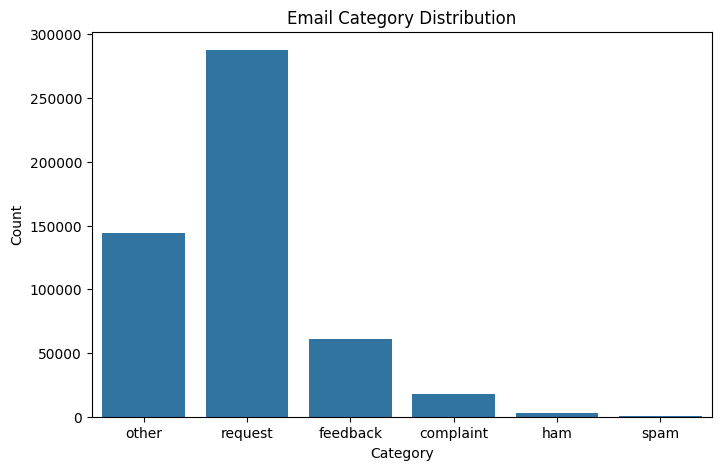

In [4]:
plt.figure(figsize=(8,5))
sns.countplot(x='auto_category', data=df)
plt.title("Email Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [5]:
df['auto_category'].value_counts(dropna=False)

auto_category
request      287686
other        144013
feedback      60867
complaint     17938
ham            2801
spam            501
Name: count, dtype: int64

Urgency Level Distribution for unclipped Dataset

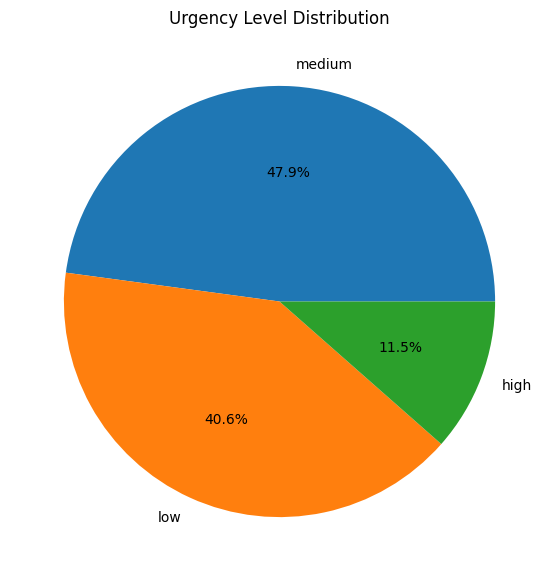

auto_urgency
medium    245930
low       208814
high       59062
Name: count, dtype: int64

In [6]:
plt.figure(figsize=(7,7))
df['auto_urgency'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Urgency Level Distribution")
plt.ylabel("")
plt.show()
df['auto_urgency'].value_counts(dropna=False)

Distribution of Email Length for Unclipped dataset

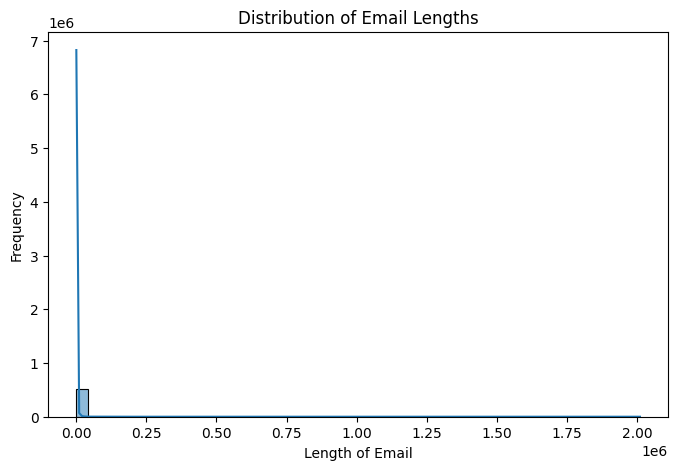

,email_length
count,5.138060e+05
mean,1.779609e+03
std,8.229663e+03
min,2.100000e+01
25%,2.740000e+02
50%,7.010000e+02
75%,1.622000e+03
max,2.010652e+06


In [7]:
df['email_length'] = df['clean_text'].str.len()

plt.figure(figsize=(8,5))
sns.histplot(df['email_length'], bins=50, kde=True)
plt.title("Distribution of Email Lengths")
plt.xlabel("Length of Email")
plt.ylabel("Frequency")
plt.show()
df[['email_length']].describe()

Checking for Email Length for clipping the emails beyond the length 10,000

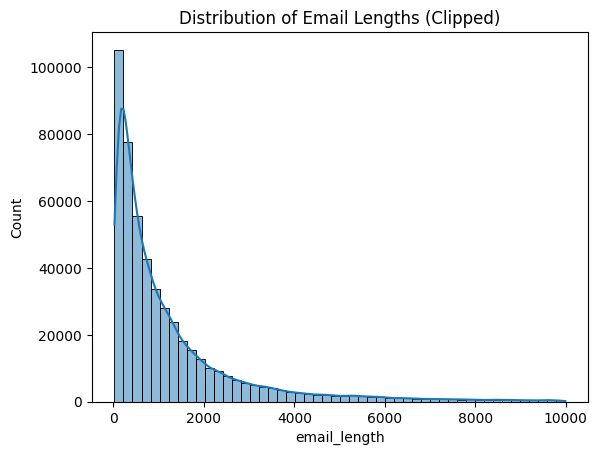

,email_length
count,502505.000000
mean,1226.420541
std,1537.787459
min,21.000000
25%,268.000000
50%,675.000000
75%,1523.000000
max,9995.000000


In [8]:
df_clipped = df[df['email_length'] < 10000]

sns.histplot(df_clipped['email_length'], bins=50, kde=True)
plt.title("Distribution of Email Lengths (Clipped)")
plt.show()
df_clipped[['email_length']].describe()

Thus, saving this final clipped dataset and considering this as final dataset

In [ ]:
df_clipped = df[df['email_length'] < 10000]
df_clipped.to_csv("../Cleaned data/final_email_dataset_clipped.csv", index=False)

In [12]:
df_clipped.head()

,clean_text,category,auto_category,auto_urgency,email_length
0,Traveling to have a business meeting takes the...,unknown,other,low,783
1,test successful. way to go!!!,unknown,other,low,30
2,"Randy,\n Can you send me a schedule of the sal...",unknown,request,medium,185
3,Let's shoot for Tuesday at 11:45.,unknown,other,low,33
4,"Greg,\n How about either next Tuesday or Thurs...",unknown,other,low,57


**Visualizations for clipped dataset**

Email Category Distribution

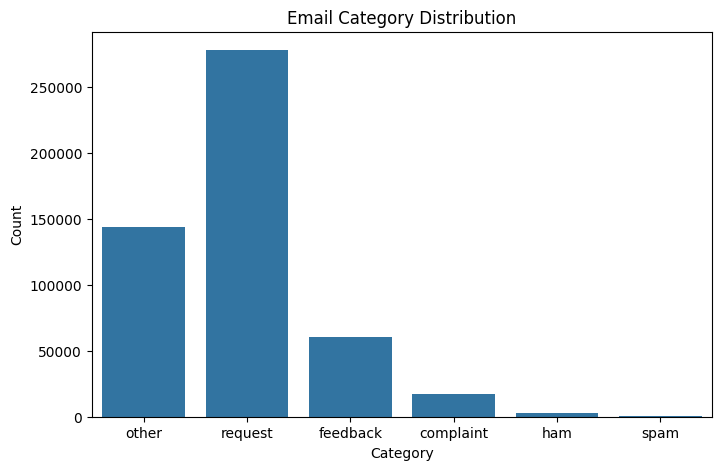

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x='auto_category', data=df_clipped)
plt.title("Email Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

**Key Insight:**

* Request emails are the majority class.

* Complaint emails are relatively fewer.

* Spam and ham represent a very small portion of the dataset.

In [14]:
df_clipped['auto_category'].value_counts(dropna=False)

auto_category
request      278027
other        143729
feedback      60609
complaint     17088
ham            2608
spam            444
Name: count, dtype: int64

Urgency Level Distribution

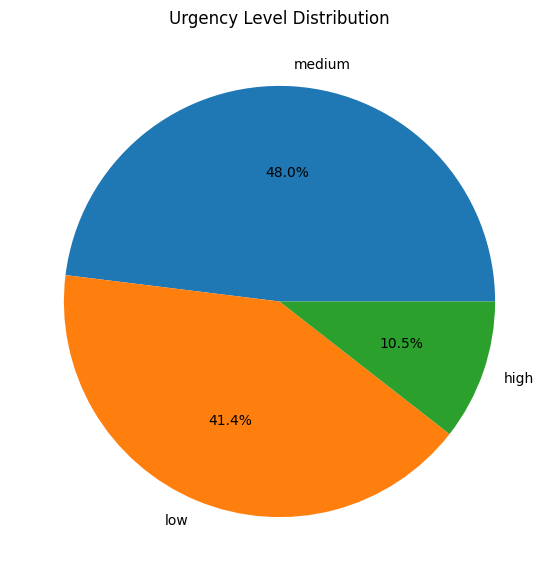

auto_urgency
medium    241443
low       208101
high       52961
Name: count, dtype: int64

In [19]:
plt.figure(figsize=(7,7))
df_clipped['auto_urgency'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Urgency Level Distribution")
plt.ylabel("")
plt.show()
df_clipped['auto_urgency'].value_counts(dropna=False)

**Key Insight:**

* Most emails are moderately important.

* Low-urgency messages include casual or informational communications.

* High-urgency emails are naturally less frequent but critical for operations.

Category vs Urgency Heatmap

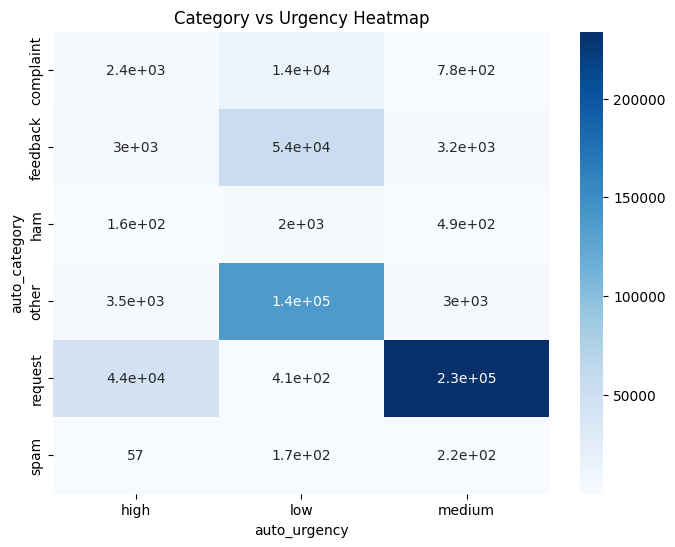

In [15]:
pivot = df_clipped.pivot_table(index='auto_category', columns='auto_urgency', aggfunc='size', fill_value=0)

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap='Blues')
plt.title("Category vs Urgency Heatmap")
plt.show()


**Key Insight:**

* Each category has a meaningful urgency profile.

* Requests are mostly medium urgency.

* Complaints can be both high or low urgency depending on context.

* Spam has almost no urgency—an expected and correct pattern.

Wordcloud to identify what are the dominating words in the dataset

In [22]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


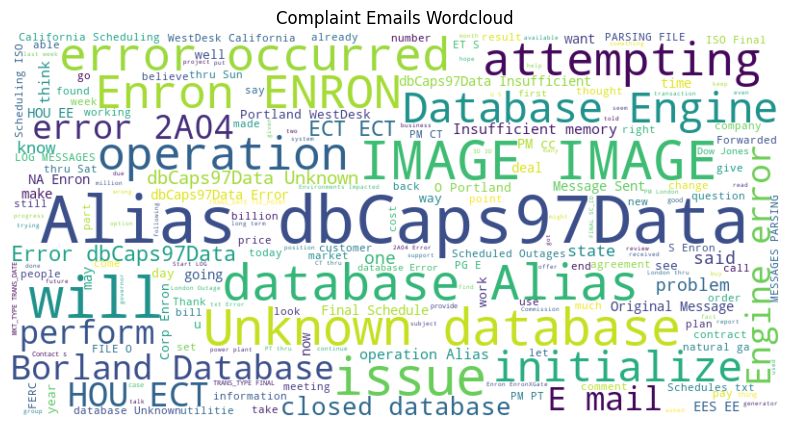

In [16]:
from wordcloud import WordCloud

text = " ".join(df_clipped[df_clipped['auto_category']=='complaint']['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Complaint Emails Wordcloud")
plt.show()


**Key Insight:**

* Complaint emails primarily involve technical problems.

* Common themes include database errors, initialization failures, parsing issues, and system malfunctions.

* Indicates that the dataset consists of internal operational complaints rather than customer grievances.